In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('../data/LLCP2017.csv')
df2 = pd.read_csv('../data/LLCP2018.csv')
df3 = pd.read_csv('../data/LLCP2019.csv')
df4 = pd.read_csv('../data/LLCP2020.csv')
df5 = pd.read_csv('../data/LLCP2021.csv')

In [4]:
# clean data according to the above rules
def clean_data(df):
    bronchitis_col = [col for col in df.columns if col.startswith('CHCCOPD')][0]
    depression_col = [col for col in df.columns if col.startswith('ADDEPEV')][0]
    diabetes_col = [col for col in df.columns if col.startswith('DIABETE')][0]
    kidney_col = [col for col in df.columns if col.startswith('CHCK')][0]
    sex_col = [col for col in df.columns if col.startswith('SEX')][0]
    heart_attack_col = [col for col in df.columns if col.startswith('CVDINFR')][0]
    stroke_col = [col for col in df.columns if col.startswith('CVDSTRK')][0]
    arthritis_col = [col for col in df.columns if col.startswith('_DRDXAR')][0]

    df['GenHealth'] = df['GENHLTH'].replace({7: None, 9: None})
    df['EXERANY2'] = df['EXERANY2'].replace({7: None, 9: None})
    df['ASTHMA3'] = df['ASTHMA3'].replace({1: 1, 2: 0, 7: None, 9: None})
    df[depression_col] = df[depression_col].replace({1: 1, 2: 0, 7: None, 9: None})
    df[diabetes_col] = df[diabetes_col].replace({1: 2, 2: 0, 3: 0, 4: 1, 7: None, 9: None})
    df[kidney_col] = df[kidney_col].replace({1: 1, 2: 0, 7: None, 9: None})
    df['CHCSCNCR'] = df['CHCSCNCR'].replace({1: 1, 2: 0, 7: None, 9: None})
    df['_BMI5CAT'] = df['_BMI5CAT'].replace({7: None, 9: None})
    df['_SMOKER3'] = df['_SMOKER3'].replace({1: 4, 2: 3, 3: 2, 4: 1, 7: None, 9: None})
    df['DRNKANY5'] = df['DRNKANY5'].replace({1: 1, 2: 0, 7: None, 9: None})
    df['_AGEG5YR'] = df['_AGEG5YR'].replace({14: None})
    df[sex_col] = df[sex_col].replace({1:1, 2:0, 7: None, 9: None})
    df['CVDCRHD4'] = df['CVDCRHD4'].replace({1: 1, 2: 0, 7: None, 9: None})
    df[stroke_col] = df[stroke_col].replace({1: 1, 2: 0, 7: None, 9: None})
    df[heart_attack_col] = df[heart_attack_col].replace({1: 1, 2: 0, 7: None, 9: None})
    df[bronchitis_col] = df[bronchitis_col].replace({1: 1, 2: 0, 7: None, 9: None})
    df[arthritis_col] = df[arthritis_col].replace({1: 1, 2: 0, 7: None, 9: None})

    # drop all the other columns
    cols_used = ['GenHealth', 'ASTHMA3', depression_col, diabetes_col, heart_attack_col, stroke_col, 'EXERANY2', 'CHCSCNCR', 
                kidney_col, '_BMI5CAT', '_SMOKER3', 'DRNKANY5', '_AGEG5YR', 'CVDCRHD4', sex_col, '_IMPRACE', bronchitis_col, arthritis_col]
    cholesterol_col = [col for col in df.columns if col.startswith('_RFCHOL')]
    if cholesterol_col != []:
        cholesterol_col = cholesterol_col[0]
        cols_used.append(cholesterol_col)
        df[cholesterol_col] = df[cholesterol_col].replace({1: 0, 2: 1, 9: None})
    else:
        df['_RFCHOL'] = None
    told_chol_high_col = [col for col in df.columns if col.startswith('TOLDHI')]
    if told_chol_high_col != []:
        told_chol_high_col = told_chol_high_col[0]
        df[told_chol_high_col] = df[told_chol_high_col].replace({1: 1, 2: 0, 7: None, 9: None})
        cols_used.append(told_chol_high_col)
    else:
        df['TOLDHI'] = None
    df = df[cols_used]


    # one-hot encode _IMPRACE
    df = pd.concat([df, pd.get_dummies(df['_IMPRACE'], prefix='Race')], axis=1)
    df = df.drop(['_IMPRACE'], axis=1)

    return df

In [5]:
df1 = clean_data(df1)

In [6]:
df2 = clean_data(df2)

In [7]:
df3 = clean_data(df3)

In [8]:
df4 = clean_data(df4)

In [9]:
df5 = clean_data(df5)

In [20]:
# combine all datasets
df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [21]:
# remove all rows with CVDCRHD4 missing values
df = df.dropna(subset=['CVDCRHD4'])

In [22]:
# combine all all column names that starts with 'CHCK'
cols = [col for col in df.columns if col.startswith('CHCK')]
df['Kidney'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'CHCCOPD'
cols = [col for col in df.columns if col.startswith('CHCCOPD')]
df['Bronchitis'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'ADDEPEV'
cols = [col for col in df.columns if col.startswith('ADDEPEV')]
df['Depression'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'DIABETE'
cols = [col for col in df.columns if col.startswith('DIABETE')]
df['Diabetes'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'SEX'
cols = [col for col in df.columns if col.startswith('SEX')]
df['Sex'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'CVDINFR'
cols = [col for col in df.columns if col.startswith('CVDINFR')]
df['Heart Attack'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with '_RFCHOL'
cols = [col for col in df.columns if col.startswith('_RFCHOL')]
df['Cholesterol'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'CVDSTRK'
cols = [col for col in df.columns if col.startswith('CVDSTRK')]
df['Stroke'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with 'TOLDHI'
cols = [col for col in df.columns if col.startswith('TOLDHI')]
df['Told Cholesterol High'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

# combine all all column names that starts with '_DRDXAR'
cols = [col for col in df.columns if col.startswith('_DRDXAR')]
df['Arthritis'] = df[cols].max(axis=1)
df = df.drop(cols, axis=1)

In [23]:
# percentage of missing values in each column, sorted in descending order
missing_values = df.isnull().sum().sort_values(ascending=False) / len(df)
missing_values = missing_values[missing_values > 0]
print(missing_values)

Cholesterol              0.469213
Told Cholesterol High    0.449226
_BMI5CAT                 0.091019
DRNKANY5                 0.059330
_SMOKER3                 0.046552
EXERANY2                 0.027070
_AGEG5YR                 0.017893
Arthritis                0.005377
Depression               0.004517
Heart Attack             0.004218
Bronchitis               0.004170
Kidney                   0.003085
ASTHMA3                  0.002838
CHCSCNCR                 0.002441
GenHealth                0.002384
Stroke                   0.002240
Diabetes                 0.001437
Sex                      0.000611
dtype: float64


In [24]:
print(df.shape)
print(df.columns)

(2127204, 25)
Index(['GenHealth', 'ASTHMA3', 'EXERANY2', 'CHCSCNCR', '_BMI5CAT', '_SMOKER3',
       'DRNKANY5', '_AGEG5YR', 'CVDCRHD4', 'Race_1.0', 'Race_2.0', 'Race_3.0',
       'Race_4.0', 'Race_5.0', 'Race_6.0', 'Kidney', 'Bronchitis',
       'Depression', 'Diabetes', 'Sex', 'Heart Attack', 'Cholesterol',
       'Stroke', 'Told Cholesterol High', 'Arthritis'],
      dtype='object')


In [25]:
df['CVDCRHD4'].value_counts()

0.0    2006774
1.0     120430
Name: CVDCRHD4, dtype: int64

<AxesSubplot:>

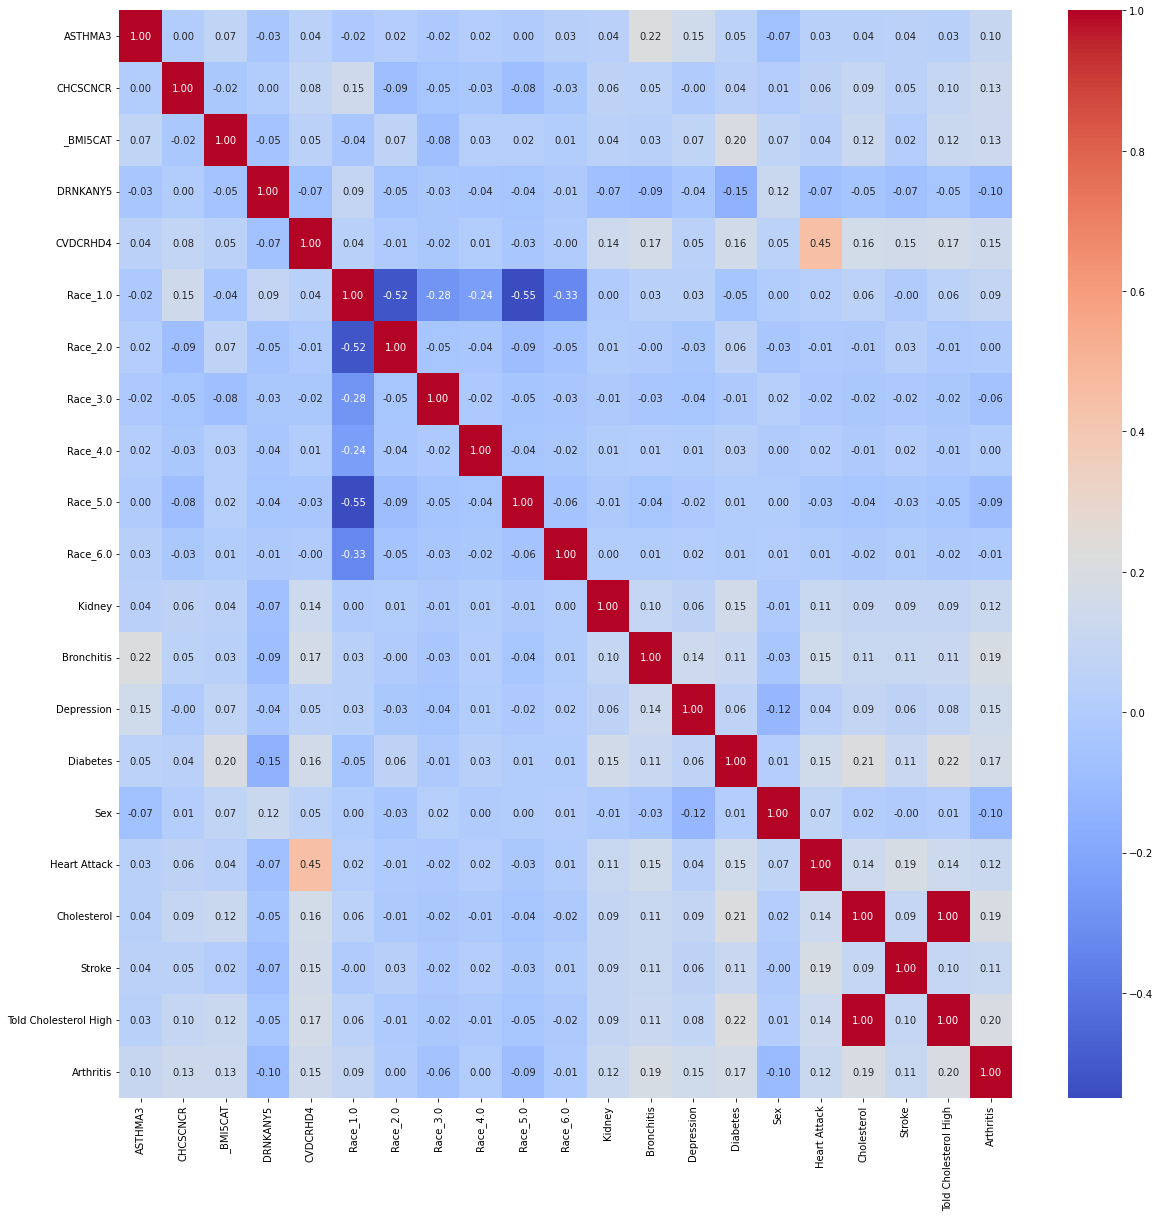

In [26]:
# heatmap of correlation between all features
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [27]:
# shuffling the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [28]:
df.to_csv('../data/LLCP_agg_cleaned.csv', index=False)